### Avocado Project   
#### Project Description  
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

#### Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

#### Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [90]:
data=pd.read_csv(r'https://raw.githubusercontent.com/manishkumbhare/Internship/main/datasets/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [91]:
data.shape

(18249, 14)

Rows : 18249, Columns : 14

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


#### Object columns : 'Date', 'type' and 'region'   
#### int64 columns  : 'Unnamed: 0' and 'year'   
rest of the columns are float64

#### #droping unwanted column 'Unnamed: 0'

In [93]:
data=data.drop(['Unnamed: 0'], axis=1)

In [94]:
data.sample(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7565,2017-03-19,1.11,634212.88,149500.57,129099.31,19059.85,336553.15,334445.43,1589.36,518.36,conventional,2017,Portland
1320,2015-08-09,1.15,2710710.15,531460.61,1328248.62,203932.87,647068.05,597061.79,48069.52,1936.74,conventional,2015,Midsouth
15539,2017-12-10,1.49,148882.83,3001.05,51148.46,0.00,94204.90,82525.77,11679.13,0.00,organic,2017,GreatLakes
13510,2016-08-28,1.51,8866.20,1.25,235.20,0.00,8629.75,8629.75,0.00,0.00,organic,2016,NorthernNewEngland
3638,2016-01-10,1.06,3310201.06,503914.83,1753942.06,352247.15,700097.02,488806.30,185907.38,25383.34,conventional,2016,GreatLakes
3879,2016-05-22,1.17,160652.39,83011.39,27437.92,356.55,49846.53,20619.97,27239.89,1986.67,conventional,2016,Jacksonville
6702,2017-07-02,1.41,189413.48,113926.84,18894.24,122.11,56470.29,31305.74,20128.72,5035.83,conventional,2017,Jacksonville
14018,2016-11-20,2.54,5413.97,1621.47,2602.34,2.66,1187.50,1128.05,59.45,0.00,organic,2016,Sacramento
7432,2017-09-24,1.32,102663.43,44018.65,25081.98,1558.08,32004.72,23199.63,8788.42,16.67,conventional,2017,Pittsburgh
13294,2016-10-23,0.82,13219.08,282.64,3978.36,0.00,8958.08,58.33,8899.75,0.00,organic,2016,Nashville


In [95]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### Observation: NO null values

### Working on date time column for seperating day , month and year

#### #First converting object data type of 'Date' column to datetime dtype

In [96]:
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


We already having 'Year' column so no need to seperating year here

In [97]:
# seperating the day and month
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month


In [98]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


#### # Dropping the column 'Date' 

In [99]:
data=data.drop('Date', axis=1)
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


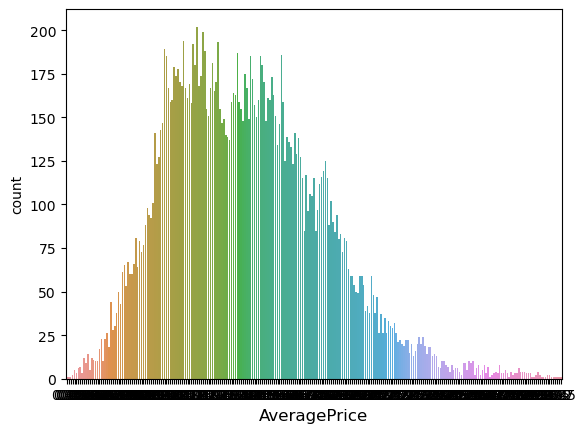

In [100]:
sns.countplot(data['AveragePrice'])
plt.xlabel('AveragePrice', fontsize=12)
plt.show()

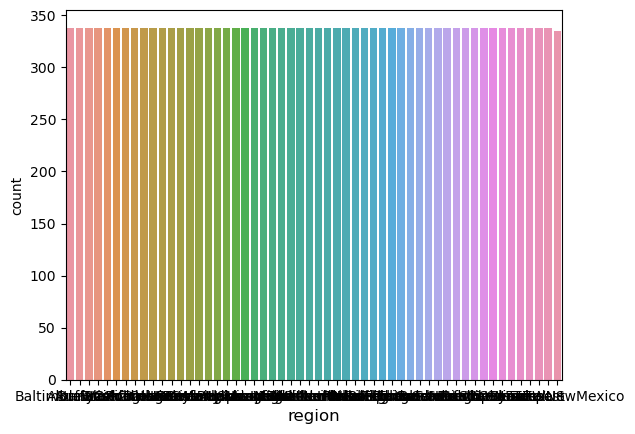

In [101]:
sns.countplot(data['region'])
plt.xlabel('region', fontsize=12)
plt.show()

In [102]:
data['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [103]:
data['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

#### # Observations:
1. target column 'AveragePrice' is having continious data so this is regression related problem  
2. target column 'region' is having catagorical data so this is classification related problem  

for column in data:
    print('\n',data[column].value_counts())


#### Observations:  
1. The columns 'type', 'region' are having Catagorical data and rest of the columns are having continious data  
2. No null values in the data set, yes but having 0.00 values

### # EDA

In [104]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Day,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,15.662612,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,8.776281,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,8.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,16.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,23.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,31.000000,12.000000


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Day           18249 non-null  int64  
 13  Month         18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


### # Encoding the object data types

In [106]:
lab=LabelEncoder()
test=[]
test=data[['type','region']]
for column in test:
    df=lab.fit_transform(test[column])
    test[column]=pd.Series(df)
    data[column]=test[column]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  Day           18249 non-null  int64  
 13  Month         18249 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


In [107]:
data['type']=data['type'].astype(float)
data['year']=data['year'].astype(float)
data['region']=data['region'].astype(float)
data['Day']=data['Day'].astype(float)
data['Month']=data['Month'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  float64
 10  year          18249 non-null  float64
 11  region        18249 non-null  float64
 12  Day           18249 non-null  float64
 13  Month         18249 non-null  float64
dtypes: float64(14)
memory usage: 1.9 MB


#### now all the columns are having float64 data type

In [108]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,15.662612,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,8.776281,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,8.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,16.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,23.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,31.000000,12.000000


#### #dist plot

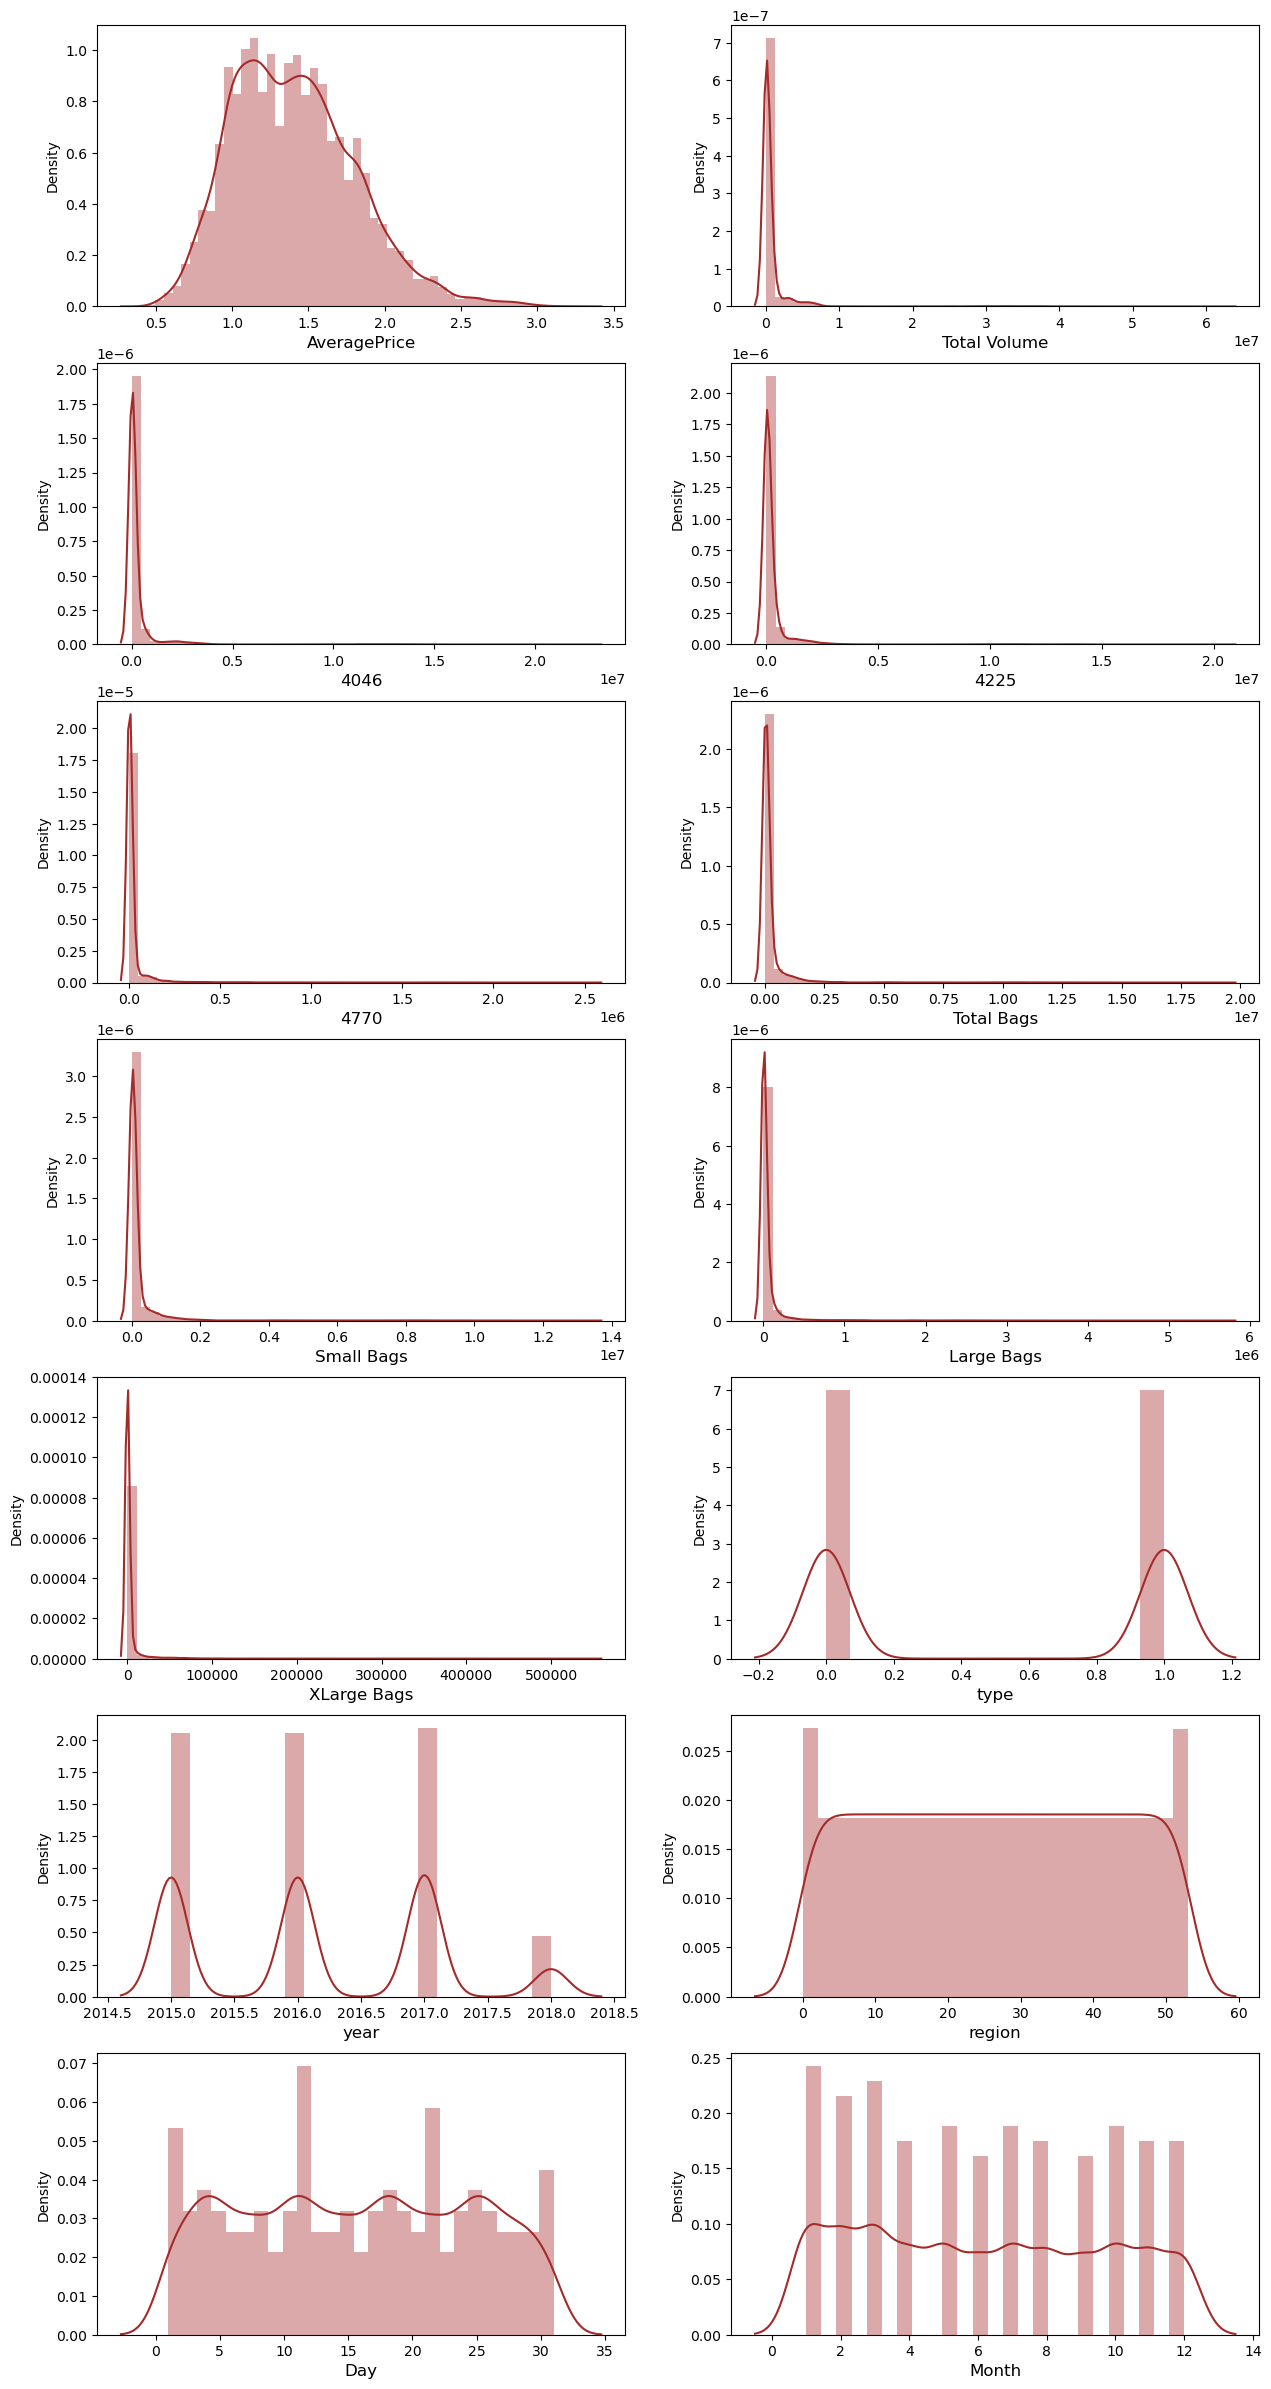

In [109]:
plt.figure(figsize=(15,30))
pltno=1
for column in data:
    if pltno<=14:
        plt.subplot(7,2,pltno)
        sns.distplot(data[column], color='brown')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### # Observations:
1. data is skewd towards Right for the columns 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Lagre Bags' and 'Xlarge Bags'

#### # Checing skewness

In [110]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Day              0.014310
Month            0.106617
dtype: float64

#### Observations:
data is very much skewed on right side

#### # using z-score method to remove skewness and outliers

In [111]:
# Z score method 
from scipy import stats

data1=data

comp=pd.DataFrame()
z = abs(stats.zscore(data1))

#np.where(z > 3)

data1 = data1[(z < 2).all(axis=1)]

comp['new'] = data1.skew()
comp['old'] = data.skew()
print(data1.shape)
comp


(16640, 14)


,new,old
AveragePrice,0.157549,0.580303
Total Volume,3.964525,9.007687
4046,5.117721,8.648220
4225,4.650204,8.942466
4770,4.988144,10.159396
Total Bags,3.934680,9.756072
Small Bags,4.210492,9.540660
Large Bags,4.522757,9.796455
XLarge Bags,6.036502,13.139751
type,-0.041599,0.000329


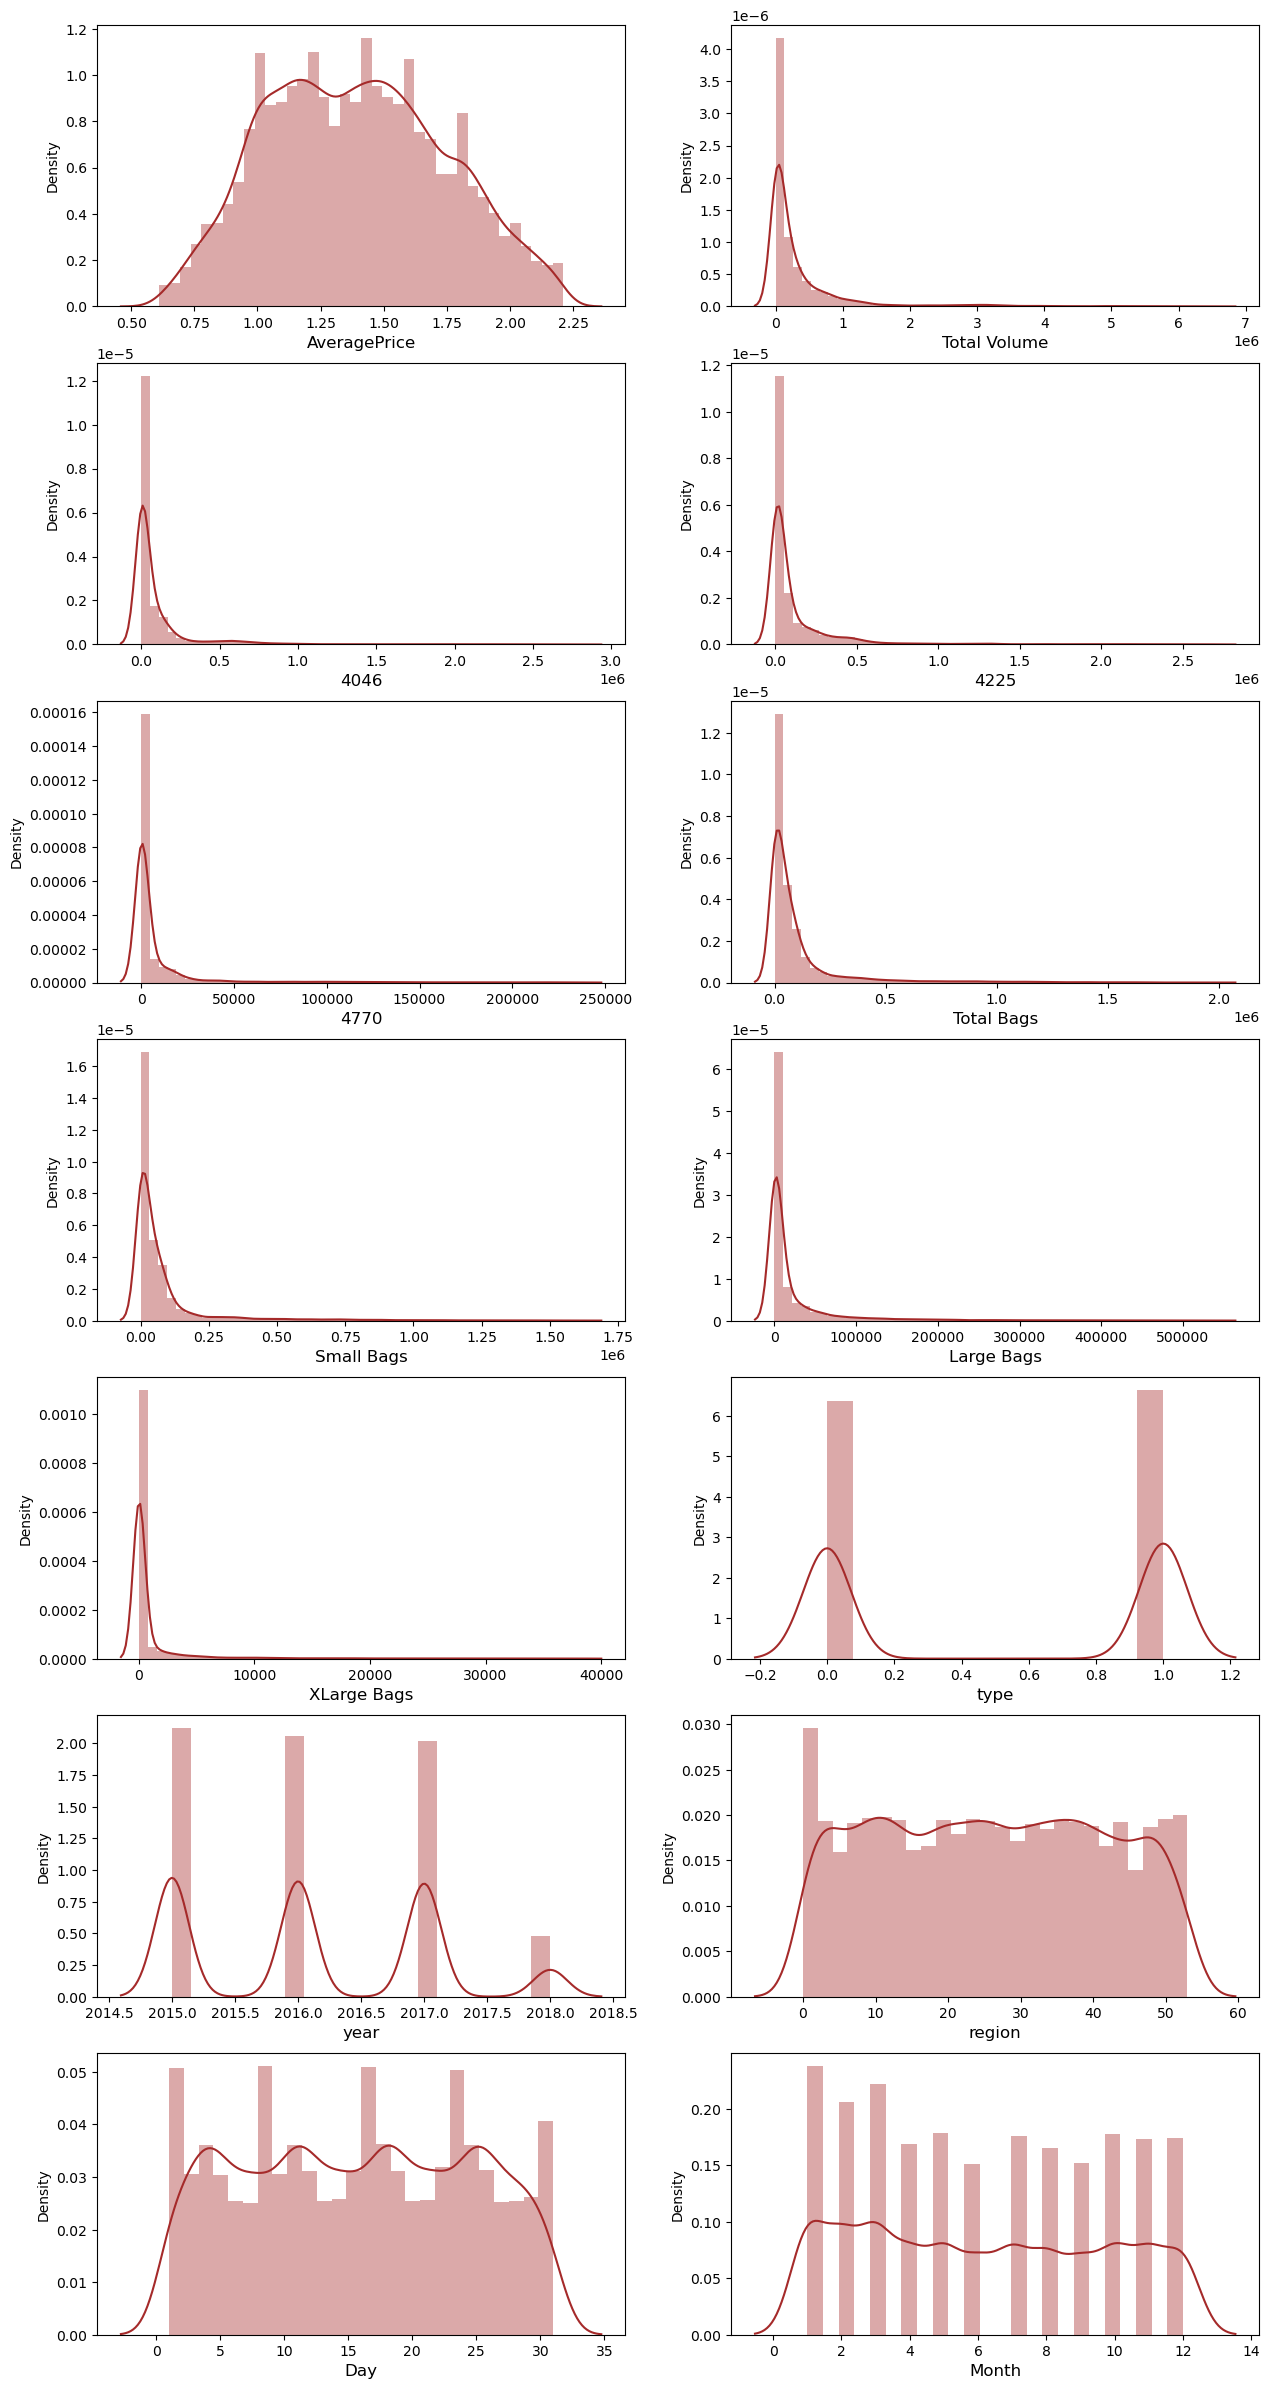

In [112]:
plt.figure(figsize=(15,30))
pltno=1
for column in data1:
    if pltno<=14:
        plt.subplot(7,2,pltno)
        sns.distplot(data1[column], color='brown')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Better in shape now

#### Observation: 
the column 'Total Bags' is derived from adding columns 'Small Bags', 'Large Bags' and 'XLarge Bags' so this column is not independent so dropping this column

In [113]:
data1.reset_index(drop=True)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015.0,0.0,27.0,12.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015.0,0.0,20.0,12.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015.0,0.0,13.0,12.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015.0,0.0,6.0,12.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015.0,0.0,29.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16635,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018.0,53.0,4.0,2.0
16636,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018.0,53.0,28.0,1.0
16637,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018.0,53.0,21.0,1.0
16638,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018.0,53.0,14.0,1.0


In [114]:

data1.drop('Total Bags', axis=1, inplace=True)
data1.tail()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
18244,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1.0,2018.0,53.0,4.0,2.0
18245,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1.0,2018.0,53.0,28.0,1.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1.0,2018.0,53.0,21.0,1.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1.0,2018.0,53.0,14.0,1.0
18248,1.62,17489.58,2894.77,2356.13,224.53,11988.14,26.01,0.0,1.0,2018.0,53.0,7.0,1.0


In [115]:
data1.shape

(16640, 13)

### # Multi-corelation heatmap

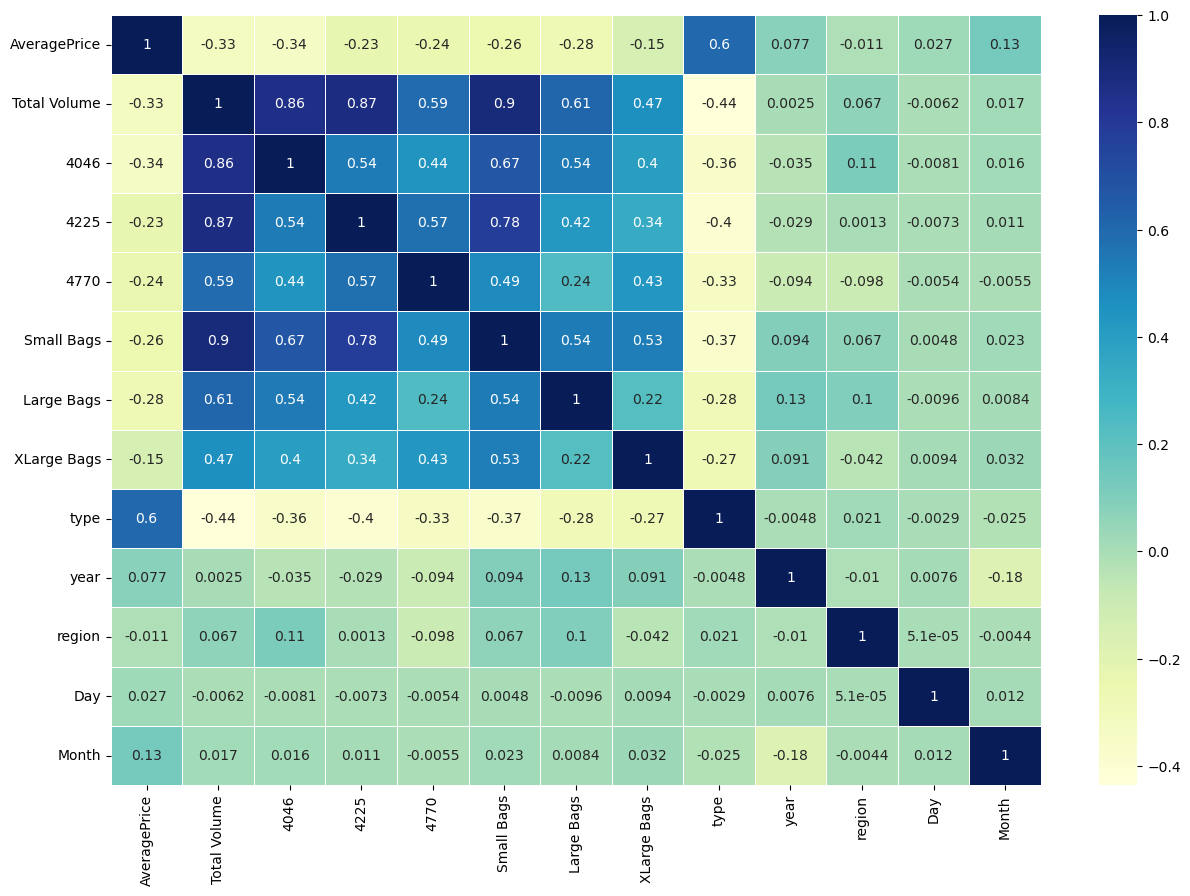

In [116]:
plt.subplots(figsize=(15,10))
sns.heatmap(data1.corr(),cmap='YlGnBu',annot=True, linewidth=.5)
plt.show()

#### # Observation:
1. The column 'Total Volume' is highly corelated to 'small Bags', '4225' and '4046' columns
2. column 'small Bags' is 78% corelated to column '4225'

#### #dropping column 'Total Volume'

In [117]:
data1.drop(['Total Volume'], axis=1, inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16640 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  16640 non-null  float64
 1   4046          16640 non-null  float64
 2   4225          16640 non-null  float64
 3   4770          16640 non-null  float64
 4   Small Bags    16640 non-null  float64
 5   Large Bags    16640 non-null  float64
 6   XLarge Bags   16640 non-null  float64
 7   type          16640 non-null  float64
 8   year          16640 non-null  float64
 9   region        16640 non-null  float64
 10  Day           16640 non-null  float64
 11  Month         16640 non-null  float64
dtypes: float64(12)
memory usage: 1.7 MB


#### #replotting multi co-relation heatmap

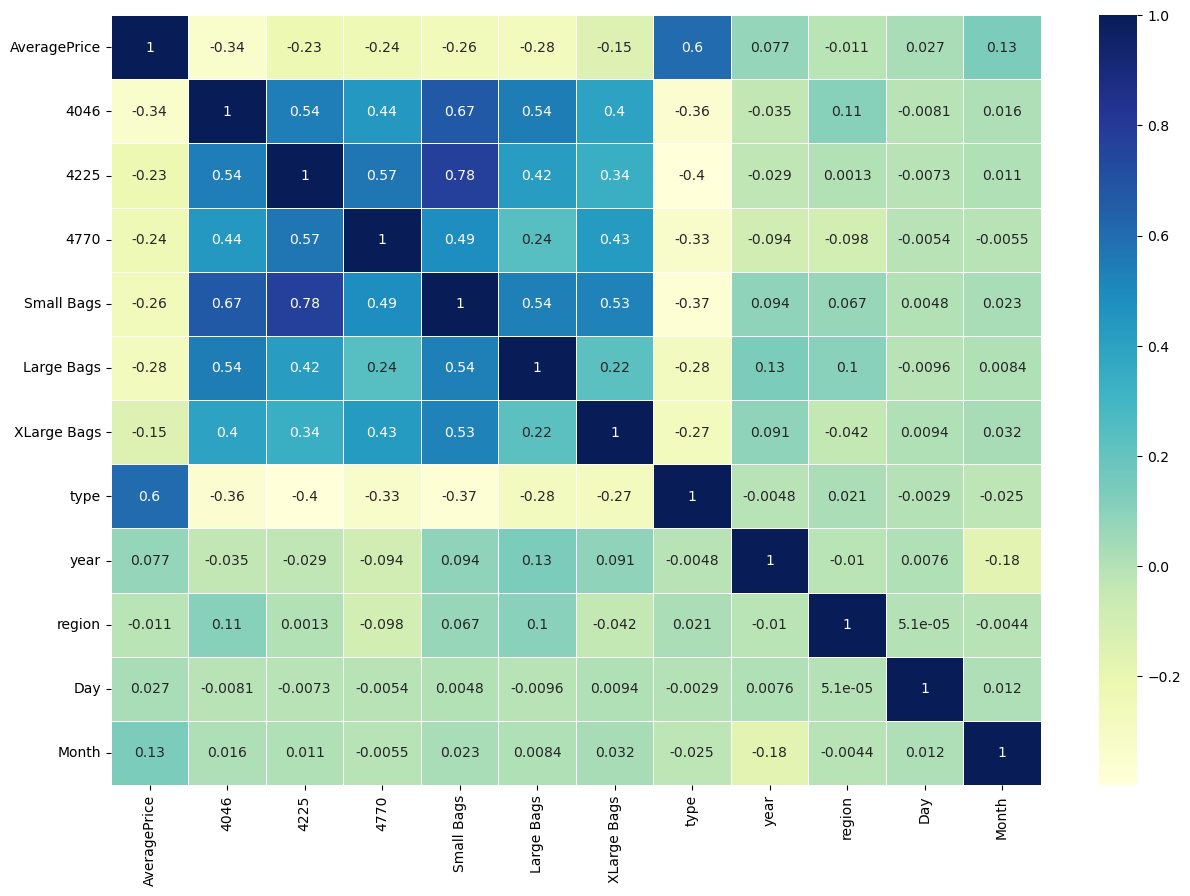

In [118]:
plt.subplots(figsize=(15,10))
sns.heatmap(data1.corr(),cmap='YlGnBu',annot=True, linewidth=.5)
plt.show()

We are keeping the columns '4225' and 'small Bags' as it is as it may happen that this variety of Avocordo are supplied in small bags only.

### # Model buliding

#### # Splitting label and features
#### # Taking first  'AveragePrice' as Target column

In [119]:
X=data1.drop(['AveragePrice'], axis=1)
y=data1['AveragePrice']
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,2015.0,0.0,27.0,12.0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,2015.0,0.0,20.0,12.0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,2015.0,0.0,13.0,12.0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,2015.0,0.0,6.0,12.0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,2015.0,0.0,29.0,11.0


#### # standardising the data via Standard Scaler

In [120]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X) , columns=X.columns)
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,-0.373258,-0.257664,-0.333574,-0.422744,-0.408935,-0.268996,-1.021014,-1.195336,-1.681459,1.290463,1.634617
1,-0.374458,-0.291206,-0.333172,-0.417946,-0.408858,-0.268996,-1.021014,-1.195336,-1.681459,0.491741,1.634617
2,-0.374059,-0.070770,-0.330322,-0.426092,-0.408756,-0.268996,-1.021014,-1.195336,-1.681459,-0.306982,1.634617
3,-0.372942,-0.197792,-0.332609,-0.440195,-0.408201,-0.268996,-1.021014,-1.195336,-1.681459,-1.105704,1.634617
4,-0.373573,-0.293941,-0.332483,-0.438353,-0.407045,-0.268996,-1.021014,-1.195336,-1.681459,1.518670,1.353793


#### # Test train split

In [121]:
#importing libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [122]:
# Finding the best Random State
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    ln_pred=ln.predict(x_test)
    acc=r2_score(y_test,ln_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("Max R2 Score is :  ", maxacc, "And @ Random State :  ", maxrs)
    

Max R2 Score is :   0.46572267626871944 And @ Random State :   6


In [123]:
x_train,x_test,y_train,y_test=train_test_split(X ,y ,test_size=0.25, random_state = maxrs)

In [124]:
# Linear Regression Model
ln=LinearRegression()
ln.fit(x_train,y_train)
ln_pred_test=ln.predict(x_test)
ln_pred_train=ln.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,ln_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,ln_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,ln_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,ln_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,ln_pred_test)))

R2 Score on Train data :   42.31086707854411  %
R2 Score on test data :   46.57226762687194  %
Mean Absolute Error :   0.2076009323993459
Mean Squared Error :   0.06702750367009135
Root Mean Squared Error :   0.25889670463351083


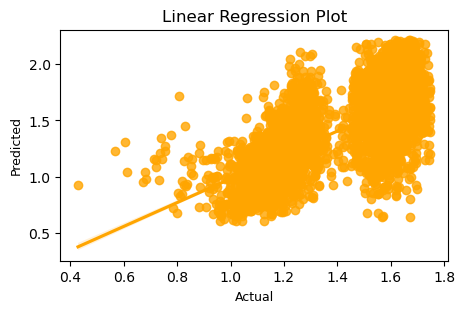

In [125]:
plt.figure(figsize=(5,3))
sns.regplot(x=ln_pred_test, y=y_test, color='orange')
plt.xlabel('Actual', fontsize=9)
plt.ylabel('Predicted', fontsize=9)
plt.title('Linear Regression Plot', fontsize=12)
plt.show()

In [126]:
# importing more libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [127]:
# KNN model
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,knn_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,knn_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,knn_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,knn_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,knn_pred_test)))

R2 Score on Train data :   72.35713696845039  %
R2 Score on test data :   59.63495438071871  %
Mean Absolute Error :   0.16808653846153845
Mean Squared Error :   0.05063977307692307
Root Mean Squared Error :   0.22503282666518473


In [128]:
# Random Forest Regressor model
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pred_test=RF.predict(x_test)
RF_pred_train=RF.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,RF_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,RF_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,RF_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,RF_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,RF_pred_test)))

R2 Score on Train data :   98.1370816357082  %
R2 Score on test data :   87.7856596552485  %
Mean Absolute Error :   0.08818927884615384
Mean Squared Error :   0.015323441701923077
Root Mean Squared Error :   0.12378788996474202


In [129]:
# Extra Trees Regressor model
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred_test=et.predict(x_test)
et_pred_train=et.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,et_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,et_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,et_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,et_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,et_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   90.93213479775866  %
Mean Absolute Error :   0.07593341346153845
Mean Squared Error :   0.011376046504807691
Root Mean Squared Error :   0.10665855101588288


In [130]:
# Decision Tree Regressor model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred_test=dt.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,dt_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,dt_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,dt_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,dt_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,dt_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   73.5165666269262  %
Mean Absolute Error :   0.12230288461538462
Mean Squared Error :   0.03322466346153847
Root Mean Squared Error :   0.18227633818337055


In [131]:
# Ridge model
Ri=Ridge()
Ri.fit(x_train,y_train)
Ri_pred_test=Ri.predict(x_test)
Ri_pred_train=Ri.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,Ri_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,Ri_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,Ri_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,Ri_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,Ri_pred_test)))

R2 Score on Train data :   42.31086664415534  %
R2 Score on test data :   46.57170808081802  %
Mean Absolute Error :   0.2076026254080035
Mean Squared Error :   0.0670282056458915
Root Mean Squared Error :   0.2588980603362866


In [132]:
# Gradient Boosting Regressor model
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred_test=gb.predict(x_test)
gb_pred_train=gb.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,gb_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,gb_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,gb_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,gb_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,gb_pred_test)))

R2 Score on Train data :   73.58871108395219  %
R2 Score on test data :   74.20642588468283  %
Mean Absolute Error :   0.14116626608474897
Mean Squared Error :   0.03235920386074161
Root Mean Squared Error :   0.1798866416962127


In [133]:
# SVR model
svr=SVR()
svr.fit(x_train,y_train)
svr_pred_test=svr.predict(x_test)
svr_pred_train=svr.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,svr_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,svr_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,svr_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,svr_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,svr_pred_test)))


R2 Score on Train data :   66.06924179941439  %
R2 Score on test data :   67.2658712302244  %
Mean Absolute Error :   0.15420740131648844
Mean Squared Error :   0.04106644318965916
Root Mean Squared Error :   0.20264857065782418


### # Cross Validation Score

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [135]:
#Linear Regression Model
score1=cross_val_score(ln,X,y,cv=kf,scoring='r2')
print('Score : ', score1)
print('Avg Score : ', score1.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,ln_pred_test) - score1.mean())*100, "%")

Score :  [0.44824405 0.44533438 0.43133415 0.42679098 0.41393576]
Avg Score :  43.31278622418061 %
Difference between CV score and R2 Score is  :  3.2594814026913332 %


In [136]:
# KNN Model
score2=cross_val_score(knn,X,y,cv=kf,scoring='r2')
print('Score : ', score2)
print('Avg Score : ', score2.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,knn_pred_test) - score2.mean())*100, "%")

Score :  [0.59285832 0.59710328 0.5747111  0.57842951 0.58171128]
Avg Score :  58.49626947078919 %
Difference between CV score and R2 Score is  :  1.1386849099295215 %


In [137]:
# Random Forest Regressor model
score3=cross_val_score(RF,X,y,cv=kf,scoring='r2')
print('Score : ', score3)
print('Avg Score : ', score3.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,RF_pred_test) - score3.mean())*100, "%")

Score :  [0.87506999 0.88708976 0.87528983 0.87404154 0.87333764]
Avg Score :  87.69657529416214 %
Difference between CV score and R2 Score is  :  0.08908436108634454 %


In [138]:
# Extra Trees Regressor model
score4=cross_val_score(et,X,y,cv=kf,scoring='r2')
print('Score : ', score4)
print('Avg Score : ', score4.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,et_pred_test) - score4.mean())*100, "%")

Score :  [0.90555477 0.9112175  0.90538117 0.90393028 0.90470622]
Avg Score :  90.61579871700147 %
Difference between CV score and R2 Score is  :  0.31633608075719577 %


In [139]:
# Decision Tree Regressor model
score5=cross_val_score(dt,X,y,cv=kf,scoring='r2')
print('Score : ', score5)
print('Avg Score : ', score5.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,dt_pred_test) - score5.mean())*100, "%")

Score :  [0.71963339 0.7720277  0.73848473 0.74761748 0.7220586 ]
Avg Score :  73.99643795402807 %
Difference between CV score and R2 Score is  :  -0.4798713271018551 %


In [140]:
# Ridge model
score6=cross_val_score(Ri,X,y,cv=kf,scoring='r2')
print('Score : ', score6)
print('Avg Score : ', score6.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,Ri_pred_test) - score6.mean())*100, "%")

Score :  [0.44824163 0.44533231 0.43133417 0.42679303 0.41393868]
Avg Score :  43.31279625758313 %
Difference between CV score and R2 Score is  :  3.258911823234889 %


In [141]:
# Gradient Boosting Regressor model
score7=cross_val_score(gb,X,y,cv=kf,scoring='r2')
print('Score : ', score7)
print('Avg Score : ', score7.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,gb_pred_test) - score7.mean())*100, "%")

Score :  [0.7294067  0.73557044 0.71462161 0.72299526 0.71836995]
Avg Score :  72.41927919434592 %
Difference between CV score and R2 Score is  :  1.7871466903369049 %


In [142]:
# SVR model
score8=cross_val_score(svr,X,y,cv=kf,scoring='r2')
print('Score : ', score8)
print('Avg Score : ', score8.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,svr_pred_test) - score8.mean())*100, "%")

Score :  [0.65528896 0.66696755 0.64732429 0.64922444 0.63540945]
Avg Score :  65.08429375549083 %
Difference between CV score and R2 Score is  :  2.181577474733576 %


#### # So our best performing model is:
#### Random Forest Regressor model  
  
R2 Score on Train data :   98.15  %  
R2 Score on test data :   87.84  %  
Mean Absolute Error :   0.089  
Mean Squared Error :   0.015  
Root Mean Squared Error :   0.123  

Avg Score :  87.68 %
Difference between CV score and R2 Score is  :  0.157 %

### # Hyper parameter tuning

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
params={'n_estimators': [100, 200, 300],
    'criterion':['squared_error','absolute_error'],   
    'max_features': [1.0,'sqrt','log2'],}

In [145]:
grid_search = GridSearchCV(estimator=RF,param_grid=params,cv=kf)

In [58]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [59]:
print('Best Score  : ',grid_search.best_score_)
print('\nBest Parameters : ', grid_search.best_params_)

Best Score  :  0.855251770966127

Best Parameters :  {'criterion': 'squared_error', 'max_features': 1.0, 'n_estimators': 300}


In [149]:
Final_Model=RandomForestRegressor(criterion= 'squared_error', max_depth= None, max_features= 1.0, n_estimators= 300)
Final_Model.fit(x_train,y_train)
Final_Model_pred_test=Final_Model.predict(x_test)
Final_Model_pred_train=Final_Model.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,Final_Model_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,Final_Model_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,Final_Model_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,Final_Model_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,Final_Model_pred_test)))

R2 Score on Train data :   98.21324838679666  %
R2 Score on test data :   87.90093857332513  %
Mean Absolute Error :   0.08797366987179489
Mean Squared Error :   0.015178819091880348
Root Mean Squared Error :   0.12320235018813704


In [150]:
#saving the model
import pickle
pickle.dump(Final_Model, open('Avocado_project_AvgPrice_predication.pkl', 'wb'))

In [151]:
#load model
load_model=pickle.load(open('Avocado_project_AvgPrice_predication.pkl', 'rb'))
final_result=load_model.score(x_test,y_test)
print('The Final Result is  :  ',final_result*100)

The Final Result is  :   87.90093857332513


In [152]:
#comparing results
compare=pd.DataFrame({'Predicted' : load_model.predict(x_test), 'Actual' : y_test})
compare

,Predicted,Actual
18099,1.774633,1.88
5065,1.093000,1.12
5364,1.434467,1.56
17998,1.553200,1.54
7089,1.307767,1.32
...,...,...
3892,1.043800,1.01
11665,1.885400,1.85
17957,1.788433,1.56
5159,0.921033,1.00


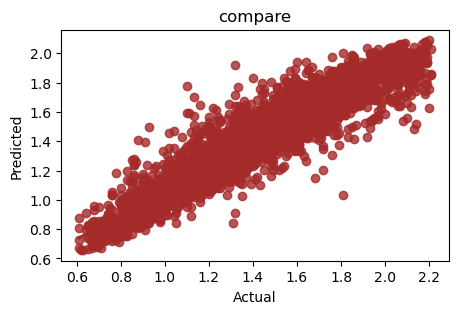

In [153]:
plt.figure(figsize=(5,3))
sns.regplot(x=compare['Actual'], y=compare['Predicted'], color='brown')
plt.title('compare')
plt.show()

### # Now spliting the dataset into Feature and Label, taking column 'region' as Target Column

In [154]:
X=data1.drop(['region'], axis=1)
y=data1['region']
X.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Day,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,2015.0,27.0,12.0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,2015.0,20.0,12.0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,2015.0,13.0,12.0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,2015.0,6.0,12.0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,2015.0,29.0,11.0


#### #as our target column is having equal data for each value so we are good to proceed as it is

In [155]:
# Importing all other libraries for modeling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score

In [156]:
# Random Forest Classifier
rs=0
max_acc=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy > max_acc:
        max_acc=accuracy
        rs=i
print("Max accuracy score : ", max_acc, "   , at Random state : ", rs)

Max accuracy score :  0.9230769230769231    , at Random state :  14


In [157]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=rs)
x_test

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Day,Month
8436,1.15,378161.23,115974.20,360.91,55077.35,65984.79,0.00,0.0,2017.0,15.0,10.0
13419,2.15,4303.03,13793.10,2706.92,11496.63,2205.79,0.00,1.0,2016.0,29.0,5.0
7717,1.02,55938.36,55664.31,124.64,106593.49,2951.72,17.24,0.0,2017.0,7.0,5.0
101,1.11,372236.92,18701.90,511.69,16782.71,23257.77,0.00,0.0,2015.0,18.0,1.0
8956,1.09,35632.00,58767.29,184.49,62260.15,32827.64,0.00,0.0,2018.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3909,1.13,67268.17,48015.11,8491.64,47831.39,83393.09,0.00,0.0,2016.0,23.0,10.0
10373,1.48,12.41,824.64,0.00,478.15,80.55,0.00,1.0,2015.0,4.0,1.0
17942,1.36,107369.04,329956.50,956.38,55583.56,1218.21,0.00,1.0,2018.0,18.0,2.0
4267,1.52,13893.11,696042.02,2350.43,214068.14,33668.33,453.64,0.0,2016.0,4.0,12.0


In [158]:
# Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfc_y_pred=rf.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,rfc_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,rfc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,rfc_y_pred))

accuracy_score : 0.921875

 confusion_matrix  : 
 [[84  0  0 ...  0  0  0]
 [ 0 81  0 ...  0  0  1]
 [ 0  0 63 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  1  0 ...  0  0 74]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        86
         1.0       0.85      0.90      0.88        90
         2.0       0.94      0.98      0.96        64
         3.0       0.93      0.86      0.89        78
         4.0       0.98      0.93      0.95       107
         5.0       0.82      0.81      0.81        73
         6.0       0.97      1.00      0.98        57
         7.0       0.93      0.97      0.95        64
         8.0       0.99      0.98      0.98        84
         9.0       0.88      0.94      0.91        64
        10.0       0.89      0.87      0.88       103
        11.0       0.96      0.95      0.96        82
        12.0       0.98      0.93      0.95        90
        

In [159]:
#Support Vector Classifier
svc=SVC()
svc.fit(x_train, y_train)
svc_y_pred=svc.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,svc_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,svc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,svc_y_pred))

accuracy_score : 0.32427884615384617

 confusion_matrix  : 
 [[27  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 30]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.33      0.31      0.32        86
         1.0       0.76      0.18      0.29        90
         2.0       0.91      0.48      0.63        64
         3.0       0.11      0.41      0.18        78
         4.0       0.80      0.33      0.46       107
         5.0       0.20      0.33      0.24        73
         6.0       1.00      0.18      0.30        57
         7.0       0.58      0.30      0.39        64
         8.0       1.00      0.44      0.61        84
         9.0       0.46      0.39      0.42        64
        10.0       0.53      0.17      0.26       103
        11.0       0.79      0.38      0.51        82
        12.0       0.90      0.30      0.45        

In [160]:
#Gradient Boosting Classifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_y_pred=gb.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,gb_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,gb_y_pred))
print("\n classification_report  : \n", classification_report(y_test,gb_y_pred))

accuracy_score : 0.83125

 confusion_matrix  : 
 [[78  0  0 ...  0  0  0]
 [ 0 60  0 ...  0  0  2]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 45  0]
 [ 0  0  1 ...  0  0 70]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        86
         1.0       0.74      0.67      0.70        90
         2.0       0.88      0.94      0.91        64
         3.0       0.84      0.78      0.81        78
         4.0       0.86      0.78      0.81       107
         5.0       0.78      0.71      0.74        73
         6.0       0.94      0.88      0.91        57
         7.0       0.76      0.89      0.82        64
         8.0       0.97      0.92      0.94        84
         9.0       0.77      0.80      0.78        64
        10.0       0.69      0.68      0.68       103
        11.0       0.87      0.83      0.85        82
        12.0       0.94      0.86      0.90        90
        1

In [161]:
#AdaBoost Classifier
ab=AdaBoostClassifier()
ab.fit(x_train, y_train)
ab_y_pred=ab.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,ab_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,ab_y_pred))
print("\n classification_report  : \n", classification_report(y_test,ab_y_pred))

accuracy_score : 0.05504807692307692

 confusion_matrix  : 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  9 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        86
         1.0       0.00      0.00      0.00        90
         2.0       0.09      0.48      0.15        64
         3.0       0.00      0.00      0.00        78
         4.0       0.00      0.00      0.00       107
         5.0       0.00      0.00      0.00        73
         6.0       0.00      0.00      0.00        57
         7.0       0.04      1.00      0.08        64
         8.0       0.00      0.00      0.00        84
         9.0       0.00      0.00      0.00        64
        10.0       0.00      0.00      0.00       103
        11.0       0.05      0.22      0.08        82
        12.0       0.00      0.00      0.00        

In [162]:
#Bagging Classifier
bag=BaggingClassifier()
bag.fit(x_train,y_train)
bag_y_pred=bag.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,bag_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,bag_y_pred))
print("\n classification_report  : \n", classification_report(y_test,bag_y_pred))

accuracy_score : 0.864423076923077

 confusion_matrix  : 
 [[80  0  0 ...  0  0  0]
 [ 0 76  0 ...  0  0  0]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 43  0]
 [ 0  3  0 ...  0  0 66]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        86
         1.0       0.78      0.84      0.81        90
         2.0       0.89      1.00      0.94        64
         3.0       0.88      0.88      0.88        78
         4.0       0.86      0.90      0.88       107
         5.0       0.77      0.81      0.79        73
         6.0       0.93      0.95      0.94        57
         7.0       0.87      0.95      0.91        64
         8.0       0.97      0.93      0.95        84
         9.0       0.80      0.89      0.84        64
        10.0       0.79      0.83      0.81       103
        11.0       0.90      0.93      0.92        82
        12.0       0.92      0.88      0.90        90

In [163]:
#Extra Trees Classifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
et_y_pred=et.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,et_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,et_y_pred))
print("\n classification_report  : \n", classification_report(y_test,et_y_pred))


accuracy_score : 0.9230769230769231

 confusion_matrix  : 
 [[83  0  0 ...  0  0  0]
 [ 0 82  0 ...  0  0  1]
 [ 0  0 63 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  1  0 ...  0  0 73]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        86
         1.0       0.88      0.91      0.90        90
         2.0       0.94      0.98      0.96        64
         3.0       0.92      0.88      0.90        78
         4.0       0.98      0.96      0.97       107
         5.0       0.90      0.82      0.86        73
         6.0       0.98      1.00      0.99        57
         7.0       0.85      0.97      0.91        64
         8.0       1.00      1.00      1.00        84
         9.0       0.81      0.95      0.88        64
        10.0       0.91      0.81      0.86       103
        11.0       0.96      0.94      0.95        82
        12.0       0.99      0.90      0.94        9

#### So, the best accuracy scores is 92.3 % with 'Extra Trees Classifier' 

### # Cross validation score

In [164]:
from sklearn.model_selection import cross_val_score

In [166]:
#Cross validation for Random forest classifier
cv_score = cross_val_score(rf,X,y,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Random forest classifier : ', (accuracy_score(y_test,rfc_y_pred)-cv_score.mean()))

[0.75904121 0.83129996 0.83592764 0.7690366  0.63651662 0.67648296
 0.64997897]
0.7368977077221527
difference in score Random forest classifier :  0.18497729227784732


In [167]:
#Cross validation for support vector classifier
cv_score = cross_val_score(svc,X,y,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score support vector classifier : ', (accuracy_score(y_test,svc_y_pred)-cv_score.mean()))

[0.51093356 0.58435002 0.58392932 0.33487589 0.04922171 0.04417333
 0.03786285]
0.3064780976286068
difference in score support vector classifier :  0.017800748525239385


In [169]:
#Cross validation for Gradient Boosting classifier
cv_score = cross_val_score(gb,X,y,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Gradient Boosting classifier :  ', (accuracy_score(y_test,gb_y_pred)-cv_score.mean()))

[0.60344828 0.743374   0.76482962 0.71939419 0.59108119 0.6159024
 0.5128313 ]
0.6501229972789312
difference in score Gradient Boosting classifier :   0.18112700272106885


In [170]:
#Cross validation for AdaBoost classifier
cv_score = cross_val_score(ab,X,y,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score AdaBoost classifier : ', (accuracy_score(y_test,ab_y_pred)-cv_score.mean()))

[0.06055509 0.03365587 0.06394615 0.06394615 0.04711822 0.06478755
 0.08666386]
0.06009612626430017
difference in score AdaBoost classifier :  -0.00504804934122325


In [171]:
#Cross validation for Bagging classifier
cv_score = cross_val_score(bag,X,y,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Bagging classifier : ', (accuracy_score(y_test,bag_y_pred)-cv_score.mean()))

[0.68923465 0.75809844 0.75725705 0.7172907  0.57888094 0.63062684
 0.57425326]
0.6722345552827113
difference in score Bagging classifier :  0.1921885216403657


In [172]:
#Cross validation for Extratree classifier
cv_score = cross_val_score(et,X,y,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Extratree classifier : ', (accuracy_score(y_test,et_y_pred)-cv_score.mean()))

[0.80025231 0.81320993 0.81447202 0.72149769 0.54774926 0.59192259
 0.57593605]
0.6950056943137889
difference in score Extratree classifier :  0.22807122876313424


#### # Random Forest classifier is having cross val score of 73.8% with difference in cross val and accuracy sore is only 0.18, so we select Random Forest Classifier as final model

### # Hyper Parameter Tuning

In [174]:
from sklearn.model_selection import GridSearchCV

In [176]:
params={'n_estimators':[100,200],
        'criterion' : ['entropy','gini', 'log_loss'],
       'max_features' : ['sqrt', 'log2', None],
       'min_samples_split' : [2,3,4],
       'n_jobs' : [-2,-1],
       'n_estimators' : [10,20,30]}


In [179]:
gscv=GridSearchCV(rf,params,cv=3)
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 20, 30], 'n_jobs': [-2, -1]})

In [182]:
print('Best Parameters : ', gscv.best_params_)
print('\n Best Score : ', gscv.best_score_ )

Best Parameters :  {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 30, 'n_jobs': -2}

 Best Score :  0.8834935897435897


In [183]:
best_model=RandomForestClassifier(criterion = 'entropy', max_features= 'sqrt', min_samples_split= 2, n_jobs= -2,n_estimators= 30)
best_model.fit(x_train,y_train)
y_pred=best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy of the model is :  ', accuracy*100,"%" )

accuracy of the model is :   91.3701923076923 %


### # Saving model

In [186]:
#save model
pickle.dump(best_model,open('Avacardo_project_Region_Predication','wb'))

In [187]:
#load model
model=pickle.load(open('Avacardo_project_Region_Predication','rb'))

In [189]:
prediction = model.predict(x_test)
prediction

array([24., 28., 39., ..., 40., 28., 43.])

In [195]:
df=pd.DataFrame()
df['Actual'] = y_test
df['predicted']=prediction

df

,Actual,predicted
8436,53.0,24.0
13419,28.0,28.0
7717,39.0,39.0
101,1.0,1.0
8956,39.0,39.0
...,...,...
3909,21.0,21.0
10373,23.0,23.0
17942,28.0,40.0
4267,28.0,28.0
